# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 2. Load the dataset

In [2]:
data = load_iris()
X = data.data
y = data.target
features = data.feature_names

In [3]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 3. Standardize the dataset
PCA is affected by scale. It's a common practice to standardize the data before applying PCA.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA
For demonstration purposes, we'll compute all principal components. However, in practice, you may want to compute only the top few. The result is the dataset projected onto the principal components.

In [5]:
pca = PCA() # n_components=2 or n_components=0.95
X_pca = pca.fit_transform(X_scaled)

In [6]:
X_pca

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

# 5. Print the principal components

 Each row corresponds to a principal component, and the columns correspond to the original features.

In [7]:
print("Principal Components (directions of maximum variance):")
print(pca.components_)

Principal Components (directions of maximum variance):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


# 5. Get the amount of variance each PC explains

In [8]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of each PC: {explained_variance_ratio}")

Explained variance ratio of each PC: [0.72962445 0.22850762 0.03668922 0.00517871]


# 6. Scree plot and Cumulative explained variance
Useful to determine how many principal components to keep.

Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]


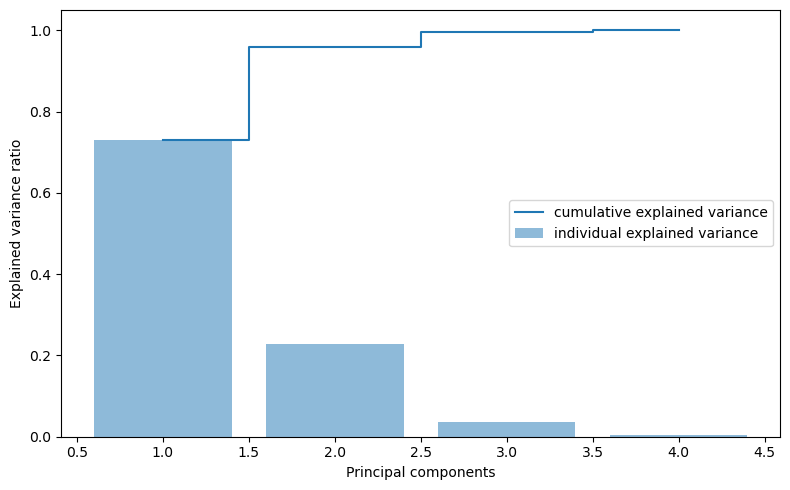

In [9]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative explained variance: {cumulative_variance}")

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

7. Plotting the PCs
For simplicity, let's visualize the data in the space of the first two PCs.

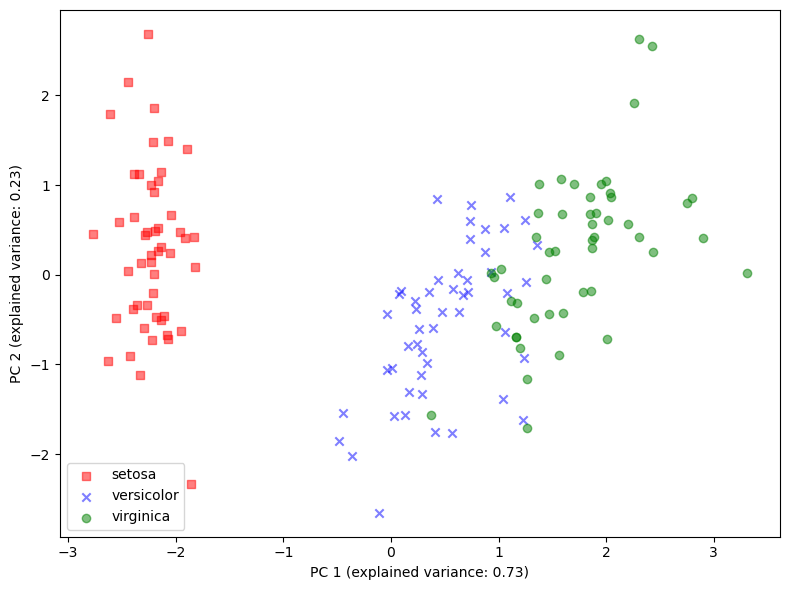

In [10]:
plt.figure(figsize=(8, 6))
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
labels = data.target_names

for i, (m, c) in enumerate(zip(markers, colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=c, label=labels[i], alpha=0.5, marker=m)

plt.xlabel(f'PC 1 (explained variance: {explained_variance_ratio[0]:.2f})')
plt.ylabel(f'PC 2 (explained variance: {explained_variance_ratio[1]:.2f})')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Incorporating PCA into a machine learning pipeline

- **Feature Reduction**: You use PCA to reduce the dimensionality of your dataset while preserving as much variance as possible.
- **Model Training**: You train your machine learning model on the transformed dataset.


However, with tools like `scikit-learn`, you can seamlessly integrate PCA and model training within a single pipeline. This ensures that the PCA transformation applied to the training data is also applied to any future test or validation data in the same way.

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with three steps:
# 1. StandardScaler() - to standardize the dataset
# 2. PCA(n_components=2) - to reduce the dimensionality to 2 principal components
# 3. SVC() - a support vector machine classifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', SVC())
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline on test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9333
